<a href="https://colab.research.google.com/github/ricardocarreras/Bootcamp_DataScience_student/blob/master/Comenzando_con_Kaggle_alumni_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalación entornos Kaggle en Google Colab

In [ ]:
!pip install kaggle

In [ ]:
# Es preferible realizar un upgrade
!pip install kaggle --upgrade

In [ ]:
# Verificamos la instalación para añadir nuestro token
!kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# Solo para Google colab para subir el fichero kaggle.json
from google.colab import files
files.upload() # upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marcusrb","key":"d11f595248585ccadeccd1e0b6854888"}'}

In [ ]:
# Como kaggle nos pide de insertar kaggle.json en una carpeta oculta .kaggle/ c
# Procederemos a crear una carpeta oculta
!mkdir -p ~/.kaggle
# copiar el fichero de nuestra carpeta /content a la carpeta /.kaggle
!cp /content/kaggle.json ~/.kaggle/ # este paso solo es válido para Google Colab
# Añadimos los permisos de usuario 600
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!ls ~/.kaggle

kaggle.json


In [ ]:
# Comprobamos la librería de kaggle
!kaggle

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: too few arguments


## Descargamos la competición desde Kaggle

hagamos uso de la documentación oficial desde GitHub 
https://github.com/Kaggle/kaggle-api

In [ ]:
# Utilizamos este comando kaggle para descargar una competición
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 50.8MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 27.3MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 9.26MB/s]


#### Eventuales errores
En caso de obtener errores se tratará de aceptar las condiciones desde la propia competición en Kaggle.

En caso de tener ficheros .zip o .tar, hay que descomprimir los ficheros previamente.

In [ ]:
# # En caso que el dataset venga en formato .zip
# !unzip -q train.csv.zip -d . # sustituir el nombre train
# !unzip -q test.csv.zip -d . # sustituir el nombre test
# !ls

In [ ]:
# en caso de querer descargar un notebook directamente con la API de Kaggle
!kaggle kernels pull sinakhorami/titanic-best-working-classifier

Source code downloaded to /content/titanic-best-working-classifier.ipynb


In [ ]:
!kaggle kernels list --user marcusrb --sort-by dateRun

ref                                                        title                                               author    lastRunTime          totalVotes  
---------------------------------------------------------  --------------------------------------------------  --------  -------------------  ----------  
marcusrb/dl-text-generation-cnn                            DL_text_generation_CNN                              marcusRB  2021-03-27 13:02:15           0  
marcusrb/exercise-dropout-and-batch-normalization          Exercise: Dropout and Batch Normalization           marcusRB  2021-03-26 21:57:53           0  
marcusrb/exercise-binary-classification                    Exercise: Binary Classification                     marcusRB  2021-03-26 13:20:18           0  
marcusrb/exercise-overfitting-and-underfitting             Exercise: Overfitting and Underfitting              marcusRB  2021-03-26 12:05:05           0  
marcusrb/exercise-stochastic-gradient-descent              Exercise: S

***
# First Kaggle challenge - Titanic

## Machine Learning from Disaster

- v1.0.0_102021
- author: mrussorb
- https://www.kaggle.com/c/titanic/

----aquí van los objetivos del challenge---

***
## Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

- Question or problem definition.
- Acquire training and testing data.
- Wrangle, prepare, cleanse the data.
- Analyze, identify patterns, and explore the data.
- Features extraction
- Model, predict and solve the problem.
- Visualize, report, and present the problem solving steps and final solution.
- Supply or submit the results.
- MLops - versioning (GitHub...)
- Package - Staging/Production env.

## Check the versions of envs.


In [ ]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.19.5
matplotlib: 3.2.2
pandas: 1.1.5
sklearn: 0.22.2.post1


In [ ]:
# Cargando las librerías por categoría
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# Generic
import os
import datetime
import itertools
import warnings
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [ ]:
## Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

## Load Dataset

In [ ]:
# Load dataset train and test
train_titanic = pd.read_csv('train.csv')
test_titanic = pd.read_csv('test.csv')

# Create titanis list with both dataset to use same cleansing methods
titanic_list = [train_titanic, test_titanic]

In [ ]:
titanic_list[1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Data description
Nuestro conjunto de datos tiene 12 columnas o varables, de las cuales 3 (Age, Cabin y Embarked) tienen valores no disponibles. La variable que queremos predecir es Survived, que nos indica si el pasajero sobrevivió a la tragedia del Titanic.

In [ ]:
# Check dataframe structure
for information in titanic_list:
    information.info()
    print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [ ]:
# Check dataframe basic stats data
for stats in titanic_list:
    print(stats)
    print('_'*40)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]
________________________________________
     PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN        S
2            894   

***

### EDA, Visualization and transformation data

We analyze all variable one by one and check null value, errors or we create new variables.

In [ ]:
# Check null and NA values for both dataset
for nuls in titanic_list:
    print(nuls.isna().sum())
    print('*'*40)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
****************************************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
****************************************


In [ ]:
# Table of relative frequency
for nuls in titanic_list:
    print(nuls.isnull().sum()/len(nuls)*100)
    print('*'*40)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
****************************************
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64
****************************************


In [ ]:
# Remove PassengerId variable only for train dataset
titanic_list[0].drop(['PassengerId'], axis=1, inplace=True)

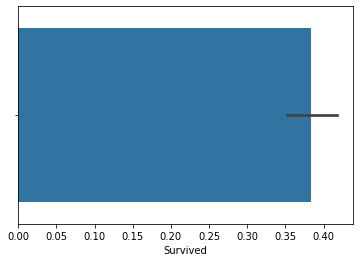

In [ ]:
sns.barplot(x="Survived", data=titanic_list[0])

#### `Pclass`

Ticket class. This is a categorical feature with 3 different values, first class, second class and third class. Exist high correlation between this feature with dependent variable.

In [ ]:
titanic_list[0][['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


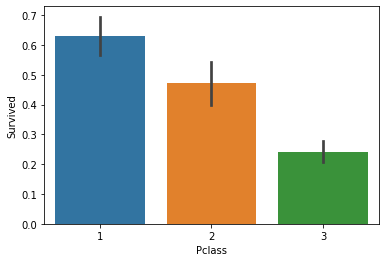

In [ ]:
sns.barplot(x="Pclass", y="Survived", data=titanic_list[0])

In [ ]:
titanic_list[1]['Sex']

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

In [ ]:
# Convertir en una variable discreta binaria
for genre in titanic_list:
  genre['Sex'] = genre.Sex.map({'female':1,
                                'male':0}).astype(int)

In [ ]:
titanic_list[0].Sex

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [ ]:
# Check ratio Embarked and Survived variable
titanic_list[0][['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [ ]:
# Fill na or null values with the most frequent value, C
freq_port = titanic_list[0].Embarked.dropna().mode()[0]
freq_port

'S'

In [ ]:
# Assign result on the dataset
for port in titanic_list:
  port['Embarked'] = port['Embarked'].fillna(freq_port)

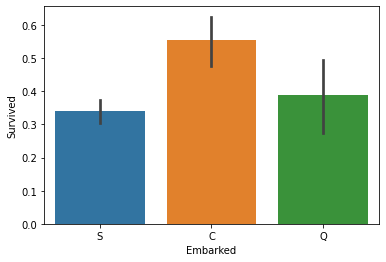

In [ ]:
sns.barplot(x="Embarked", y="Survived", data=titanic_list[0])

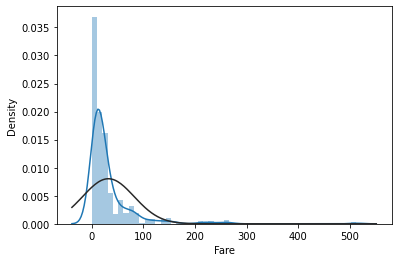

In [ ]:
sns.distplot(titanic_list[0]['Fare'], fit=norm)

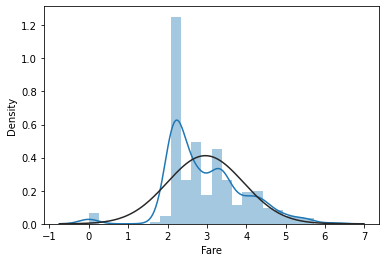

In [ ]:
for f in titanic_list:
    f['Fare'] = np.log1p(f['Fare'])
sns.distplot(titanic_list[0]['Fare'], fit=norm)

Podemos optar en transformar una variable continua en una categórica

In [ ]:
for faregr in titanic_list:
    faregr['FareGroup'] = pd.qcut(faregr['Fare'], 5, labels=['A', 'B', 'C', 'D', 'E'])


titanic_list[0][['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean()

,FareGroup,Survived
0,A,0.217877
1,B,0.201087
2,C,0.424419
3,D,0.444444
4,E,0.642045


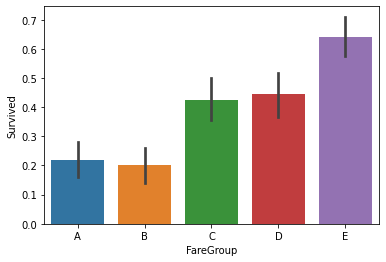

In [ ]:
sns.barplot(x="FareGroup", y="Survived", data=titanic_list[0])

In [ ]:
# En caso de eliminar una de las dos variables
# We remove the variable Fare
for fares in titanic_list:
    fares.drop(['Fare'], axis=1, inplace=True)

In [ ]:
for cab in titanic_list:
    cab['InCabin'] = ~cab['Cabin'].isnull()

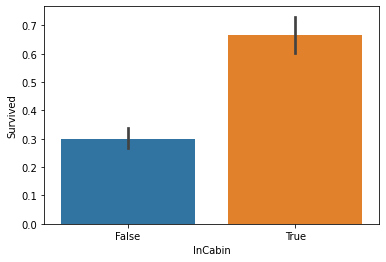

In [ ]:
sns.barplot(x="InCabin", y="Survived", data=titanic_list[0])
plt.show()

In [ ]:
# We remove the variable Cabin
for cabin in titanic_list:
    cabin.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
bins = [-1, 12, 24, 39, 60, np.inf]
labels = ['Unknown', 'Student', 'Young Adult', 'Adult', 'Senior']
for age in titanic_list:
    age["Age"] = age["Age"].fillna(-0.5)
    age['AgeGroup'] = pd.cut(age["Age"], bins=bins, labels=labels)

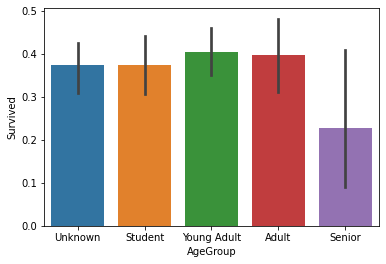

In [ ]:
sns.barplot(x="AgeGroup", y="Survived", data=titanic_list[0])
plt.show()

#### `Name`

Categorical variable with the name of the passenger. We extract from title names like as `Mr`, `Miss` or `Master`.

In [ ]:
# Check the names
titanic_list[0]['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [ ]:
# Create the function to extract the title
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

# Apply get_title function
for title in titanic_list:
    title['Title'] = title['Name'].apply(get_title)

# Check the results
pd.crosstab(titanic_list[0]['Title'], titanic_list[0]['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [ ]:
# Create a categorization on train dataset
for t in titanic_list:
    t['Title'] = t['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    t['Title'] = t['Title'].replace('Mlle', 'Miss')
    t['Title'] = t['Title'].replace('Ms', 'Miss')
    t['Title'] = t['Title'].replace('Mme', 'Mrs')

# We create a relative table
titanic_list[0][['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


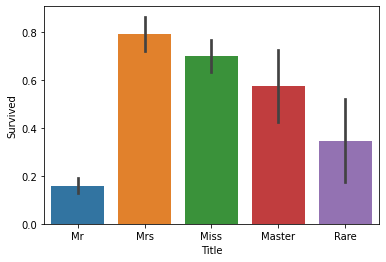

In [ ]:
sns.barplot(x="Title", y="Survived", data=titanic_list[0])
plt.show()

In [ ]:
# Remove Name variable
for name in titanic_list:
    name.drop(['Name'], axis=1, inplace=True)

In [ ]:
titanic_list[0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked,FareGroup,InCabin,AgeGroup,Title
0,0,3,0,22.0,1,0,A/5 21171,S,A,False,Student,Mr
1,1,1,1,38.0,1,0,PC 17599,C,E,True,Young Adult,Mrs
2,1,3,1,26.0,0,0,STON/O2. 3101282,S,B,False,Young Adult,Miss
3,1,1,1,35.0,1,0,113803,S,E,True,Young Adult,Mrs
4,0,3,0,35.0,0,0,373450,S,B,False,Young Adult,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,211536,S,C,False,Young Adult,Rare
887,1,1,1,19.0,0,0,112053,S,D,True,Student,Miss
888,0,3,1,-0.5,1,2,W./C. 6607,S,D,False,Unknown,Miss
889,1,1,0,26.0,0,0,111369,C,D,True,Young Adult,Mr


In [ ]:
titanic_list[1]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked,FareGroup,InCabin,AgeGroup,Title
0,892,3,0,34.5,0,0,330911,Q,B,False,Young Adult,Mr
1,893,3,1,47.0,1,0,363272,S,A,False,Adult,Mrs
2,894,2,0,62.0,0,0,240276,Q,B,False,Senior,Mr
3,895,3,0,27.0,0,0,315154,S,B,False,Young Adult,Mr
4,896,3,1,22.0,1,1,3101298,S,C,False,Student,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,-0.5,0,0,A.5. 3236,S,B,False,Unknown,Mr
414,1306,1,1,39.0,0,0,PC 17758,C,E,True,Young Adult,Rare
415,1307,3,0,38.5,0,0,SOTON/O.Q. 3101262,S,A,False,Young Adult,Mr
416,1308,3,0,-0.5,0,0,359309,S,B,False,Unknown,Mr


## Variable correlation

- What is Correlation?
- Test Dataset
- Covariance
- Pearson’s Correlation
- Spearman’s Correlation

Si visualizamos la matriz de correlación entre las variables, vemos que las mas correlacionadas con la que queremos predecir son `Sex`, `Pclass` i `isAlone`.

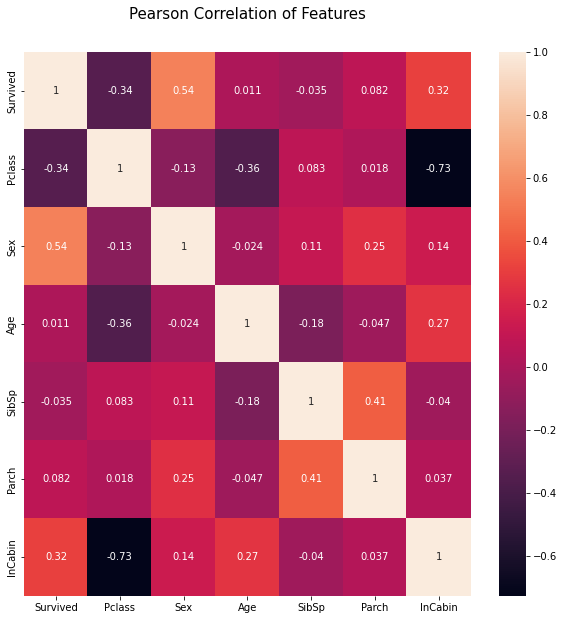

In [ ]:
correlation_matrix = titanic_list[0].corr()
correlation_matrix

plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix, annot=True)

## Binarizing categorical variables

De cada variable categórica haremos `m` variables binarias, donde `m` es el numero de categorías de la variable.

In [ ]:
# The procedure is very simple, binarizing categorical variable for training dataset
cols = ['Pclass', 'Embarked', 'FareGroup', 'AgeGroup', 'Title']
titanic_categorical = titanic_list[0][cols]
titanic_categorical = pd.concat([pd.get_dummies(titanic_categorical[col], prefix=col) for col in titanic_categorical], axis=1)
titanic_categorical.head()
train_titanic = pd.concat([titanic_list[0][titanic_list[0].columns[~titanic_list[0].columns.isin(cols)]], titanic_categorical], axis=1)
train_titanic.head()

,Survived,Sex,Age,SibSp,Parch,Ticket,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FareGroup_A,FareGroup_B,FareGroup_C,FareGroup_D,FareGroup_E,AgeGroup_Unknown,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,0,22.0,1,0,A/5 21171,False,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,1,38.0,1,0,PC 17599,True,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,1,1,26.0,0,0,STON/O2. 3101282,False,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1,1,35.0,1,0,113803,True,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4,0,0,35.0,0,0,373450,False,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0


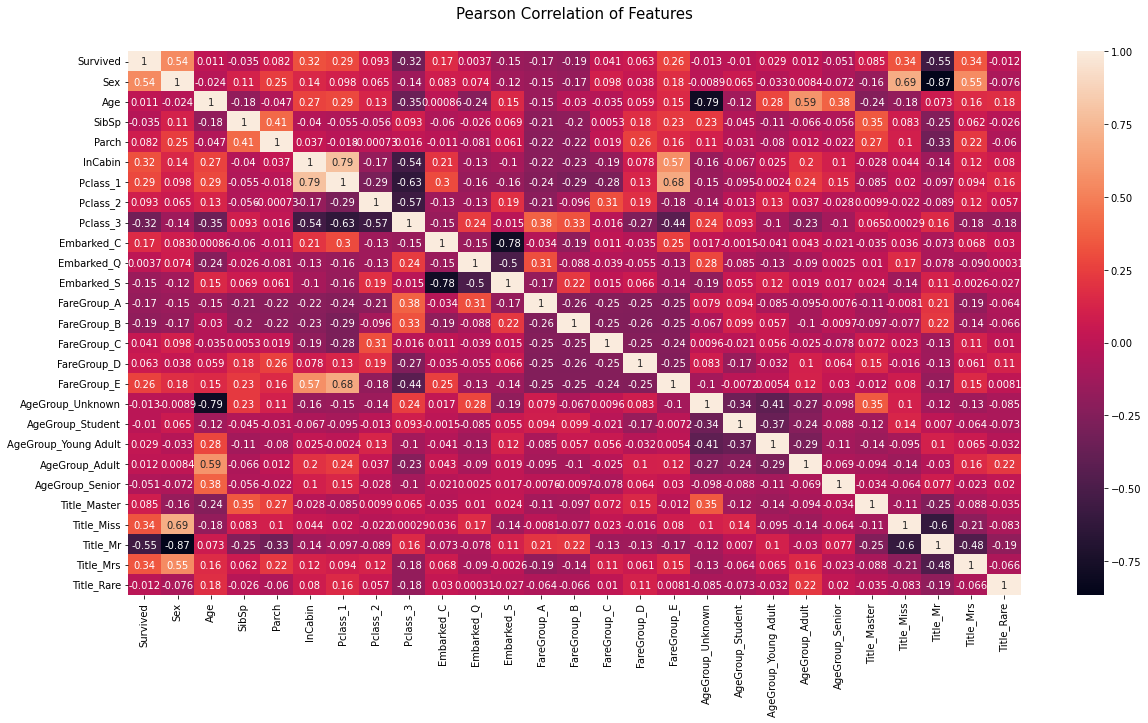

In [ ]:
correlation_matrix = train_titanic.corr()
correlation_matrix

#plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(20, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix, annot=True)

In [ ]:
# Binarizing variable for testing dataset
titanic_categorical = titanic_list[1][cols]
titanic_categorical = pd.concat([pd.get_dummies(titanic_categorical[col], prefix=col) for col in titanic_categorical], axis=1)
test_titanic = pd.concat([titanic_list[1][titanic_list[1].columns[~titanic_list[1].columns.isin(cols)]], titanic_categorical], axis=1)
test_titanic.head()

,PassengerId,Sex,Age,SibSp,Parch,Ticket,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FareGroup_A,FareGroup_B,FareGroup_C,FareGroup_D,FareGroup_E,AgeGroup_Unknown,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,0,34.5,0,0,330911,False,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,893,1,47.0,1,0,363272,False,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,894,0,62.0,0,0,240276,False,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,895,0,27.0,0,0,315154,False,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
4,896,1,22.0,1,1,3101298,False,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


## Train and Test data

Dividimos los datos en dos conjuntos, de entrenamiento y de test. Con el conjunto de entrenamiento crearemos el modelo predictivo, y con el de test, lo evaluaremos para ver qué rendimiento tiene.

In [ ]:
# Backup train and test dataset
train_bak = train_titanic
test_bak = test_titanic

In [ ]:
train_titanic

,Survived,Sex,Age,SibSp,Parch,Ticket,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FareGroup_A,FareGroup_B,FareGroup_C,FareGroup_D,FareGroup_E,AgeGroup_Unknown,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,0,22.0,1,0,A/5 21171,False,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,1,38.0,1,0,PC 17599,True,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,1,1,26.0,0,0,STON/O2. 3101282,False,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1,1,35.0,1,0,113803,True,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4,0,0,35.0,0,0,373450,False,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,0,0,211536,False,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
887,1,1,19.0,0,0,112053,True,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
888,0,1,-0.5,1,2,W./C. 6607,False,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
889,1,0,26.0,0,0,111369,True,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
test_titanic

,PassengerId,Sex,Age,SibSp,Parch,Ticket,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FareGroup_A,FareGroup_B,FareGroup_C,FareGroup_D,FareGroup_E,AgeGroup_Unknown,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,0,34.5,0,0,330911,False,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,893,1,47.0,1,0,363272,False,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,894,0,62.0,0,0,240276,False,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,895,0,27.0,0,0,315154,False,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
4,896,1,22.0,1,1,3101298,False,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,-0.5,0,0,A.5. 3236,False,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
414,1306,1,39.0,0,0,PC 17758,True,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
415,1307,0,38.5,0,0,SOTON/O.Q. 3101262,False,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
416,1308,0,-0.5,0,0,359309,False,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
colm_remover = ['Age', 'Ticket', 'PassengerId']
for col in colm_remover:
  train_titanic.drop([col], axis=1, inplace=True)

In [ ]:
train_titanic

,Survived,Sex,SibSp,Parch,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FareGroup_A,FareGroup_B,FareGroup_C,FareGroup_D,FareGroup_E,AgeGroup_Unknown,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,0,1,0,False,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,1,1,0,True,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,1,1,0,0,False,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1,1,1,0,True,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,False,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,False,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
887,1,1,0,0,True,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
888,0,1,1,2,False,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
889,1,0,0,0,True,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


## Modeling

In [ ]:
# Realizamos el split train-test
X_train = train_titanic.drop('Survived', axis=1)
y_train = train_titanic['Survived']

In [ ]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X_train

,Sex,SibSp,Parch,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FareGroup_A,FareGroup_B,FareGroup_C,FareGroup_D,FareGroup_E,AgeGroup_Unknown,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,1,0,False,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,1,0,True,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,1,0,0,False,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1,1,0,True,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4,0,0,0,False,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,False,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
887,1,0,0,True,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
888,1,1,2,False,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
889,0,0,0,True,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


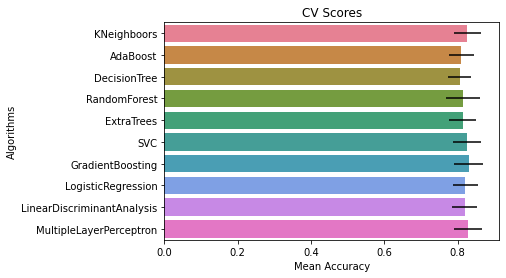

In [ ]:
# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)


# Modeling step Test differents algorithms 
random_state = 17

models = [] # append all models or predictive models 
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

models.append(KNeighborsClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(ExtraTreesClassifier(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(LogisticRegression(random_state = random_state))
models.append(LinearDiscriminantAnalysis())
models.append(MLPClassifier(random_state=random_state))


for model in models :
    cv_results.append(cross_val_score(model, X_train, y_train, 
                                      scoring = "accuracy", cv = K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "ExtraTrees",
                     "SVC",
                     "GradientBoosting",                      
                     "LogisticRegression",
                     "LinearDiscriminantAnalysis",
                     "MultipleLayerPerceptron"]
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

In [ ]:
K_fold

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

## Observando los estimadores de Clasificación

In [ ]:
# GBC Classifier - default
GBC_Model = GradientBoostingClassifier()

scores = cross_val_score(GBC_Model, X_train, y_train, cv=K_fold,
                         n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100,2)

[0.81111111 0.79775281 0.74157303 0.83146067 0.86516854 0.85393258
 0.83146067 0.82022472 0.88764045 0.86516854]


83.05

In [ ]:
type(scores)

numpy.ndarray

In [ ]:
# GBC Classifier tuning - ajuste de Hyperparámetros
GBC = GradientBoostingClassifier()

# Ajuste de parámetros
gb_param_grid = {
    'loss': ['deviance', 'exponential'],
    'n_estimators' : [25, 50, 100, 200, 300, 500],
    'learning_rate': [0.1, 0.05, 0.01, 0.001],
    'max_depth': [3, 5, 7, 9, 15],
    'min_samples_leaf': [25, 50, 100, 150, 250],
    'max_features': [0.5, 0.3, 0.1]

}

# Creamos el gridSearchCV
gsGBC = GridSearchCV(GBC, param_grid=gb_param_grid, cv=K_fold,
                     scoring='accuracy', n_jobs=4, verbose=1)

# Ajustamos al modelo
gsGBC.fit(X_train, y_train)

# Extrae el mejor resultado
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 3600 candidates, totalling 36000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   29.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:  7.7min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:  9.9min
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed: 12.1min
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed: 14.8min
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed: 17.9min
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed: 21.6min
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed: 24.8min
[Parallel(n_jobs=4)]: Done 11242 tasks      | elapsed: 28.4mi

0.8417727840199749

In [ ]:
# Linear Discriminant Analysis - default
LDA_Model = LinearDiscriminantAnalysis()

scores = cross_val_score(LDA_Model, X_train, y_train, cv=K_fold,
                         n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.81111111 0.84269663 0.7752809  0.85393258 0.83146067 0.78651685
 0.79775281 0.7752809  0.87640449 0.84269663]


81.93

In [ ]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {
              "solver" : ['svd','lsqr','eigen'],
              "tol": [0.0001, 0.0002, 0.0003],
              "store_covariance": [True]
              
              }


gsLDA = GridSearchCV(LDA, param_grid=lda_param_grid, cv=K_fold,
                     scoring='accuracy', n_jobs=4, verbose=1)

gsLDA.fit(X_train,y_train)
LDA_best = gsLDA.best_estimator_

# Best score
gsLDA.best_score_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    0.9s finished


0.8193133583021222

In [ ]:
# Logistic Regression - default
lr_Model = LogisticRegression()

scores = cross_val_score(lr_Model, X_train, y_train,
                         cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.84444444 0.83146067 0.76404494 0.85393258 0.83146067 0.76404494
 0.79775281 0.80898876 0.86516854 0.85393258]


82.15

In [ ]:
# Logistic Regression - parameters tuning
lr_Model = LogisticRegression()

# Creamos el Search Grid para el ajuste de los parámetros
lr_param_grid = {
              'penalty': ['l1', 'l2'],
              'tol':[0.0001, 0.0002, 0.0003],
              'max_iter':[100, 200, 300],
              'C': [0.01, 0.1, 1, 10, 100],
              'intercept_scaling': [1, 2, 3, 4],
              'solver': ['liblinear'],
              'verbose': [1]
              }

# Crear el GridSearch Cross Validator
gsLRM = GridSearchCV(lr_Model, param_grid=lr_param_grid, cv=K_fold,
                     scoring='accuracy', n_jobs=4, verbose=1)

# ajustamos
gsLRM.fit(X_train, y_train)
LRM_best = gsLRM.best_estimator_

# Best score
gsLRM.best_score_

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 2288 tasks      | elapsed:   22.5s
[Parallel(n_jobs=4)]: Done 3280 tasks      | elapsed:   47.3s


[LibLinear]

[Parallel(n_jobs=4)]: Done 3593 out of 3600 | elapsed:   56.4s remaining:    0.1s
[Parallel(n_jobs=4)]: Done 3600 out of 3600 | elapsed:   56.4s finished


0.8249063670411985

In [ ]:
# Random Forest Classifier Model - default
#
RFC_model = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(RFC_model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.78888889 0.84269663 0.70786517 0.82022472 0.85393258 0.83146067
 0.82022472 0.78651685 0.84269663 0.84269663]


81.37

In [ ]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100, 200, 300, 400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  2.5min finished


0.8395006242197253

In [ ]:
# Gaussian Naive Bayes
GNB_Model = GaussianNB()

scores = cross_val_score(GNB_Model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.72222222 0.75280899 0.75280899 0.7752809  0.79775281 0.75280899
 0.82022472 0.74157303 0.86516854 0.80898876]


77.9

In [ ]:
# Support Vector Machine
SVM_Model = SVC()

scores = cross_val_score(SVM_Model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.81111111 0.86516854 0.75280899 0.85393258 0.84269663 0.80898876
 0.80898876 0.7752809  0.87640449 0.85393258]


82.49

In [ ]:
### SVC classifier - parameter tuning
SVMC = SVC(probability=True)
svc_param_grid = {
                  'kernel': ['rbf'], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300]
                  }

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train, y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   39.3s finished


0.8328339575530587

In [ ]:
# Creamos el modelo VotingPredictor
# aprox. 84%
# VotingPredictor = VotingClassifier(estimators=
#                               [('rfc', RFC_best),
#                                ('gbc', GBC_best),
#                                ('svc', SVMC_best)],
#                                voting='soft', n_jobs=4
# )

# 82.97%
VotingPredictor = VotingClassifier(estimators =
                           [ ('rfc', RFC_best), 
                            ('svc', SVMC_best),
                            ('gbc', GBC_best),
                            ('lda', LDA_best),
                            ('lrm', LRM_best)],
                           voting='soft', n_jobs = 4)

# Utilizamos el mejor resultado en nuestro modelo
VotingPredictor = VotingPredictor.fit(X_train, y_train)

scores = cross_val_score(VotingPredictor, X_train, y_train, cv=K_fold,
                         n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.85555556 0.86516854 0.74157303 0.87640449 0.86516854 0.82022472
 0.80898876 0.78651685 0.88764045 0.86516854]


83.72

In [ ]:
# Realizamos la predicción
validations_cols = X_train.columns.values.tolist()
validation = test_titanic[validations_cols]

In [ ]:
test_titanic.shape

(418, 28)

In [ ]:
validation.shape

(418, 25)

In [ ]:
test_titanic.head(3)

,PassengerId,Sex,Age,SibSp,Parch,Ticket,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FareGroup_A,FareGroup_B,FareGroup_C,FareGroup_D,FareGroup_E,AgeGroup_Unknown,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,0,34.5,0,0,330911,False,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,893,1,47.0,1,0,363272,False,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,894,0,62.0,0,0,240276,False,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
# Guardamos las Ids de passenger para crear el dataframe resultado final
ids = test_titanic['PassengerId']
test_titanic.drop('PassengerId', axis=1, inplace=True)

In [ ]:
ids

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [ ]:
# Realizando la predicción al conjunto de datos de validación
data_val = VotingPredictor.predict(validation)

In [ ]:
data_val

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
submission = pd.DataFrame({
    'PassengerId' :ids,
    'Survived': data_val
})

In [ ]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv("titanic_model_vp2.csv", index=False)

In [ ]:
!kaggle competitions submit titanic -f titanic_model_vp2.csv -m "Voting Predictor v1.0.x - score 83.72"

100% 2.77k/2.77k [00:01<00:00, 1.70kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster